## **The Spark Foundation**
### **Task - Prediction using Decision Tree Algorithm**

### ***Author @ Sri Chandana***

### ***Project -Iris Dataset***

**The iris dataset contains the following data
50 samples of 3 different species of iris (150 samples total)**

Measurements: sepal length, sepal width, petal length, petal width

The format for the data: (sepal length, sepal width, petal length, petal width)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv') # Loading the data into dataframe

In [4]:
df.shape # There are 150 rows and 6 columns

(150, 6)

In [5]:
df.head() # Checking top 5 records

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info() # Checking basic info like total records and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum() # There are no null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df['Species'].value_counts() # Each species class has 50 records

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [10]:
df.describe() # Analysing statistical description this includes the count, mean, the min and max values as well as some percentiles

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Let us visualise pairplot of the data

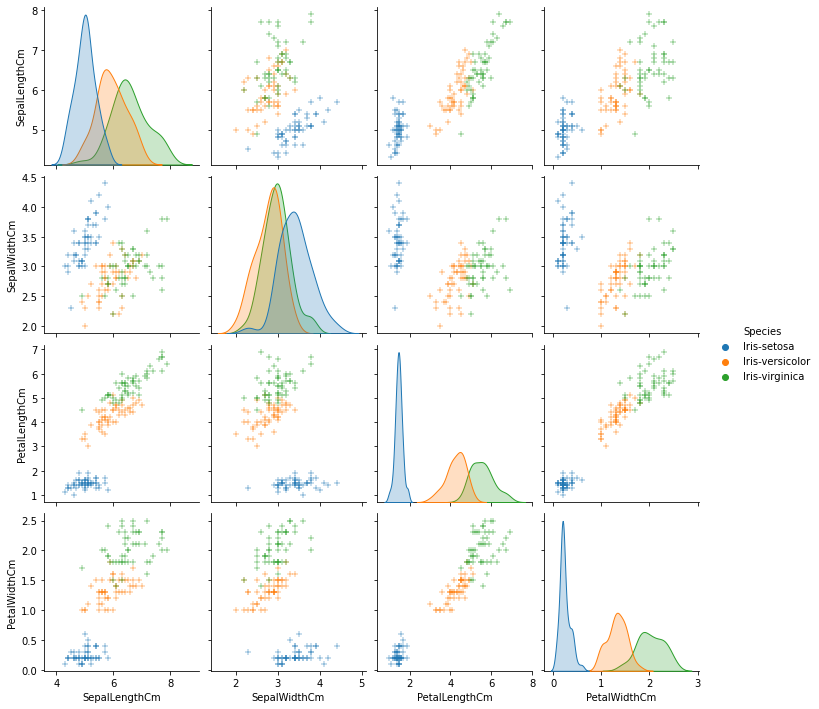

In [11]:
tmp = df.drop('Id', axis=1) # Dropping id column as it is not important
g = sns.pairplot(tmp, hue='Species', markers='+') # using seaborn to plot the pairs
plt.show()

## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


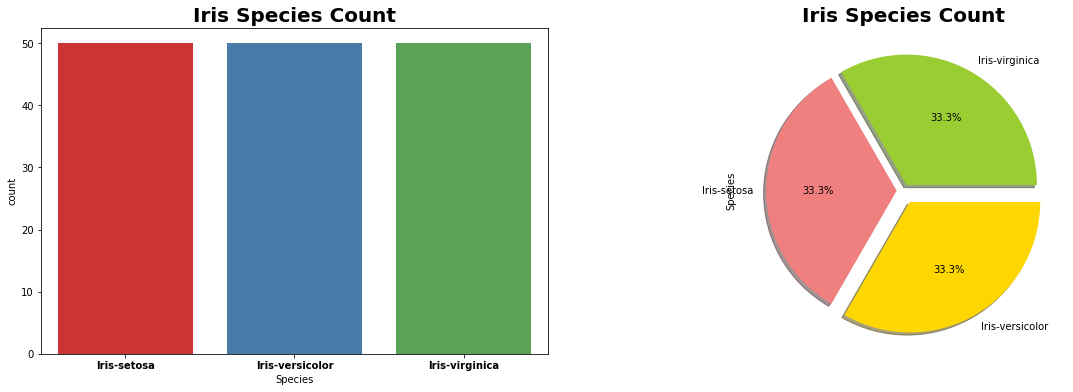

In [12]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot('Species',data=df, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.subplot(1,2,2)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

<Figure size 792x360 with 0 Axes>

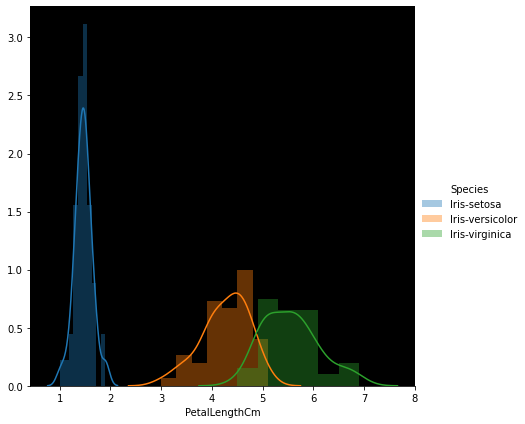

In [13]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'coral'
plt.figure(figsize = (11,5))
sns.FacetGrid(df,hue = 'Species',size = 6).map(sns.distplot,'PetalLengthCm').add_legend()
plt.show()


setosa is well separated from versicolor and virginica.

versicolor and virginica have some overlap both has approximate same feature of petallength and when we going to predict then we face some wrong prediction cause of overlap.

In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

<Figure size 792x360 with 0 Axes>

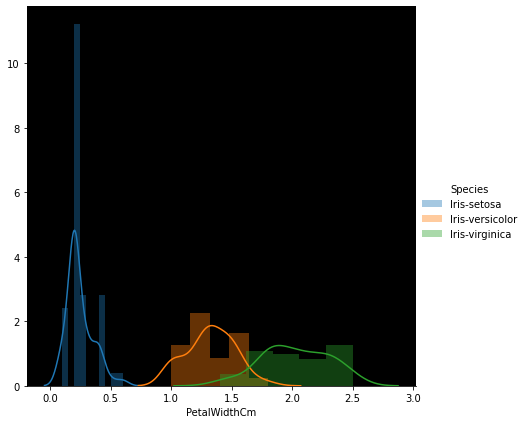

In [15]:
plt.figure(figsize = (11,5))
sns.FacetGrid(df,hue = 'Species',size = 6).map(sns.distplot,'PetalWidthCm').add_legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

<Figure size 792x360 with 0 Axes>

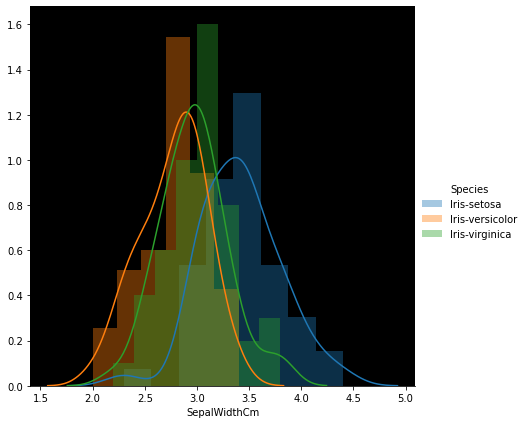

In [16]:
plt.figure(figsize = (11,5))
sns.FacetGrid(df,hue = 'Species',size = 6).map(sns.distplot,'SepalWidthCm').add_legend()
plt.show()


All the three species has approximate same sepalwidth as we can see Setosa, Versicolor, Virginia are overlapped

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

<Figure size 792x360 with 0 Axes>

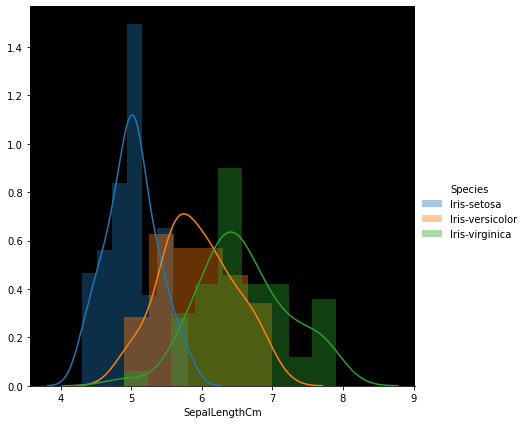

In [17]:
plt.figure(figsize = (11,5))
sns.FacetGrid(df,hue = 'Species',size = 6).map(sns.distplot,'SepalLengthCm').add_legend()
plt.show()


***All the three species has approximate same SepalLengthCm as we can see Setosa, Versicolor, Virginia are overlapped. But Setosa is littlebit differntiating from other species***

In [18]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


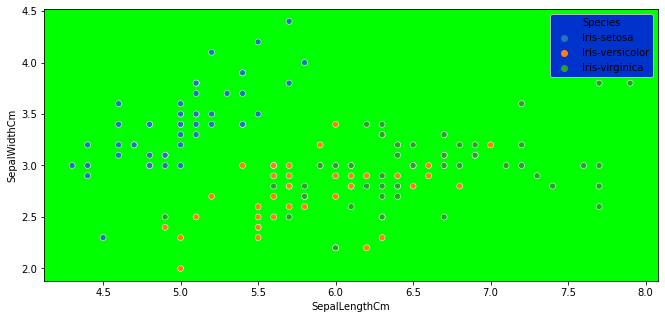

In [19]:
plt.rcParams['axes.facecolor'] = 'lime'
plt.rcParams['legend.facecolor'] = 'blue'
plt.figure(figsize = (11,5))
sns.scatterplot('SepalLengthCm','SepalWidthCm',hue = 'Species',data = df)
plt.show()

***As we can see there is no linear relationship between sepanlength and sepelwidth***

***Setosa is well seperated from other species by visualizing sepal width and sepallength***

***Setosa has some correlation between sepalwidth and sepallength***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


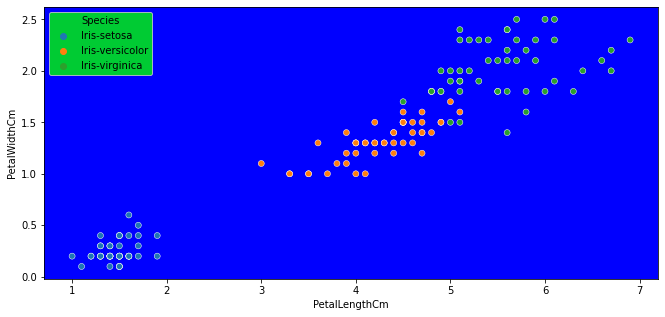

In [20]:
plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['legend.facecolor'] = 'lime'
plt.figure(figsize = (11,5))
sns.scatterplot('PetalLengthCm','PetalWidthCm',data = df,hue = 'Species')
plt.show()

***Setosa Petalwidth and petal length are weekly correlated and it is smaller then versicolor and virginia***

***Versicolor and Virginia are differentiating by visualing the scatterplot of petalwidth and petallength***

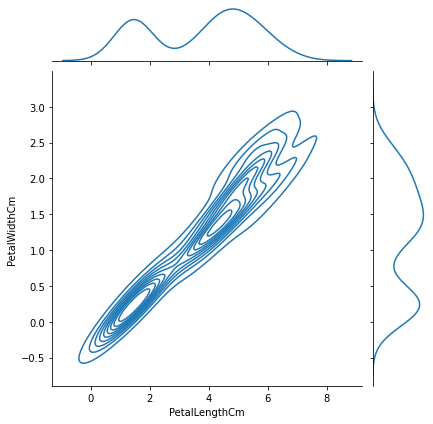

In [21]:
plt.rcParams['axes.facecolor'] = 'white'
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=df, kind="kde");
plt.show()

***By visualizing most of the datapoints are lies in between petalwidth of 1.5 to 2.5 and petal length of 4 to 6***

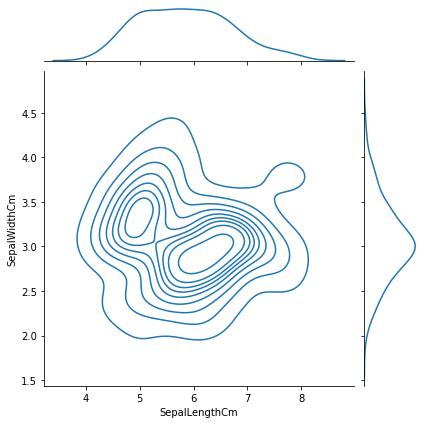

In [22]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, kind="kde");
plt.show()

***By visualizing most of the datapoints are lies in between sepalwidth of 2.5 to 3.5 and sepallength of 5 to 7***

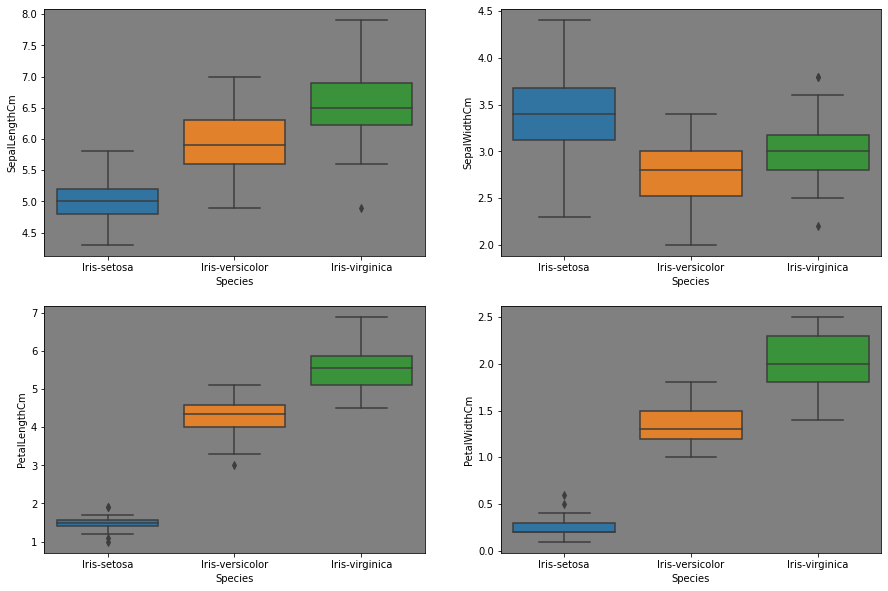

In [23]:
plt.rcParams['axes.facecolor'] = 'gray'
plt.rcParams['legend.facecolor'] = 'lime'
# Bivariate Analysis using Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species', y='SepalLengthCm', data=df)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species', y='SepalWidthCm', data=df)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species', y='PetalLengthCm', data=df)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

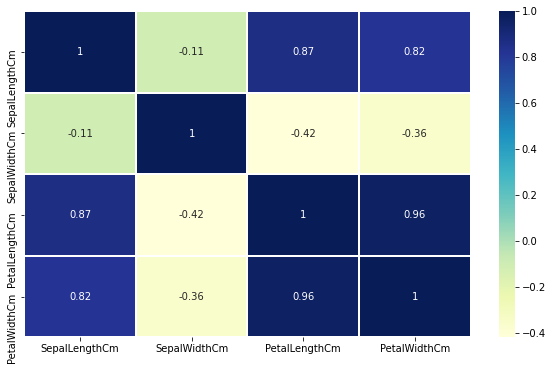

In [24]:
df = df.drop('Id', axis=1)
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="YlGnBu")
plt.show()

# Splitting Independent and Dependent Variables

In [25]:
X= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # Independent Variables
y = df['Species'] # Dependent variable

# Splitting data into Train and Test

In [26]:
from sklearn.model_selection import train_test_split # Importing Library to split the data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42) # split the data into train and test data


In [28]:
print(X_train.shape) # 100 rows and 4 columns
print(X_test.shape) # 50 rows and 4 columns

(100, 4)
(50, 4)


In [29]:
print(y_train.shape)
print(y_test.shape)

(100,)
(50,)


# Training the model with Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier from sklearn library

In [31]:
clf = DecisionTreeClassifier() # Creating a object

In [32]:
clf = clf.fit(X_train,y_train) # Fitting the model into train 

In [33]:
y_pred = clf.predict(X_test) # Predicting the model

In [34]:
y_pred # Predicted species

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

# Visulaizing Decision Tree

[Text(181.35000000000002, 201.90857142857143, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(153.45000000000002, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(209.25000000000003, 170.84571428571428, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(139.5, 139.78285714285715, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(55.800000000000004, 77.65714285714284, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(27.900000000000002, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(83.7, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(167.4, 77.65714285714284, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(139.5, 46.59428571428572, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(195.3, 46.59428571428572

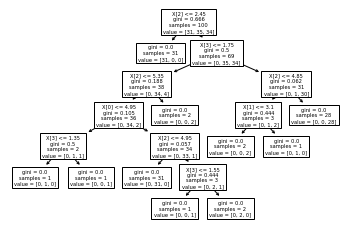

In [35]:
from sklearn import tree # Importing tree from sklearn
tree.plot_tree(clf) # Plotting fitted decision tree on IRIS

In [36]:
print(tree.export_text(clf)) # Plotting Decsion tree with text

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_3 <= 1.35
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_3 >  1.35
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 > 

# Validating the model

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Importing validation metrics from sklearn

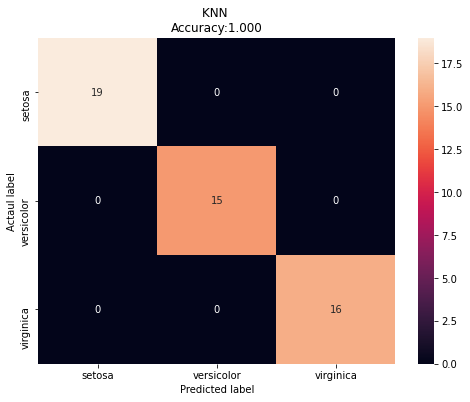

In [38]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Creating a Data frame using confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True) # Plotting heatmat of confusion matrix
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actaul label') # Actual species
plt.xlabel('Predicted label') # Predicted Species
plt.show()

In [38]:
Acuracy Score = 1.0 Which is 100% accurately predicted

In [42]:
print(classification_report(y_test , y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

